## Avoiding overfitting with the help of regularization. 
## It is just to penalize the weights in case of overfitting situation

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


In [4]:
%config Completer.use_jedi = False

In [190]:
X,y = make_classification(n_samples= 500)

In [191]:
X.shape

(500, 20)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [202]:
sc = StandardScaler()
# X_train =sc.fit_transform(X_train)

In [203]:
X_train.max()

3.149190097566348

In [204]:
# sns.histplot(X_train)

In [205]:
# sns.pairplot(pd.DataFrame(X_train))

In [206]:
plt.figure(figsize=(20,16))
# sns.heatmap(pd.DataFrame(X_train).corr(), annot=True, cmap=plt.cm.CMRmap_r)

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

In [215]:
sel_ = SelectFromModel(LogisticRegression(solver='liblinear',C=1, penalty='l1'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [216]:
imp_col_name = sel_.get_support(indices=True)


In [217]:
imp_col_name.shape

(11,)

In [218]:
df=pd.DataFrame(X_train, columns=[list(range(20))])

In [219]:
df[imp_col_name].head()

,0,1,2,5,6,7,9,11,13,15,16
0,0.132507,1.691999,-0.645568,-0.849429,-1.128864,0.706266,-0.161962,0.025626,-0.816292,0.753493,-0.993679
1,0.134955,-1.265871,0.131245,-1.638272,2.087792,1.072043,-0.508803,-0.213119,0.533679,0.312397,0.620018
2,0.809314,0.373763,1.711116,0.631211,0.895225,-0.114382,-0.231178,-0.948654,-0.332790,0.652003,0.225865
3,1.023654,-0.291412,0.845602,1.021179,1.566061,-0.319709,0.057509,0.495457,-0.201105,0.203963,0.879518
4,0.743954,0.557957,0.533784,-0.294640,1.543986,-0.294626,2.216717,1.933262,1.035652,0.099407,2.182317


In [220]:
sel_.estimator_.coef_

array([[-0.05400855, -0.21209518, -0.05644918,  0.        ,  0.        ,
         0.02569446,  3.99388757, -0.19699368,  0.        ,  0.29143975,
         0.        ,  0.23909586,  0.        , -0.10737304,  0.        ,
         0.12457861,  0.03728745,  0.        ,  0.        ,  0.        ]])

In [221]:
# there are multiple features whose coefficient are made to zero.

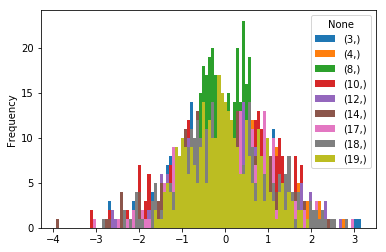

In [222]:
# all features which have less impact on model either less informative or redundant

df.drop(columns=imp_col_name).plot(kind='hist', bins= 100)

In [223]:
sel_.transform(X_test).shape

(165, 11)

In [224]:
X_test.shape

(165, 20)